In [77]:
import pandas as pd
import numpy as np

In [78]:
df=pd.read_csv("network_intrusion_data.csv")


In [79]:
df.columns=[
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [80]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [81]:
mapping = {'ipsweep.': 'Probe','satan.': 'Probe','nmap.': 'Probe','portsweep.': 'Probe','saint.': 'Probe','mscan.': 'Probe',
        'teardrop.': 'DoS','pod.': 'DoS','land.': 'DoS','back.': 'DoS','neptune.': 'DoS','smurf.': 'DoS','mailbomb.': 'DoS',
        'udpstorm.': 'DoS','apache2.': 'DoS','processtable.': 'DoS','perl.': 'U2R','loadmodule.': 'U2R','rootkit.': 'U2R','buffer_overflow.': 'U2R','xterm.': 'U2R','ps.': 'U2R',
        'sqlattack.': 'U2R','httptunnel.': 'U2R','ftp_write.': 'R2L','phf.': 'R2L','guess_passwd.': 'R2L','warezmaster.': 'R2L','warezclient.': 'R2L','imap.': 'R2L',
        'spy.': 'R2L','multihop.': 'R2L','named.': 'R2L','snmpguess.': 'R2L','worm.': 'R2L','snmpgetattack.': 'R2L',
        'xsnoop.': 'R2L','xlock.': 'R2L','sendmail.': 'R2L',
        'normal.': 'Normal'
        }

In [82]:
# Apply attack class mappings to the dataset
df['attack_class'] = df['outcome'].apply(lambda v: mapping[v])

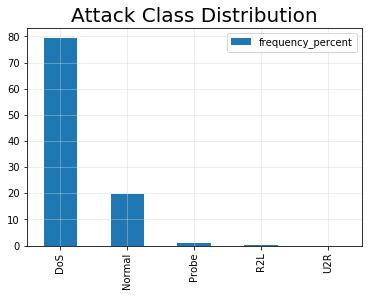

In [83]:
# Attack Class Distribution
attack_class_freq = df[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq['frequency_percent'] = round((100 * attack_class_freq / attack_class_freq.sum()),2)

attack_class_dist = pd.concat([attack_class_freq], axis=1) 
attack_class_dist

# Attack class bar plot
plot = attack_class_dist[['frequency_percent']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [85]:
def goodandbad(x):
  if x['attack_class'] == 'Normal':
    return 0
  else:
    return 1

In [86]:
df.outcome.value_counts()

smurf.              280790
neptune.            107201
normal.             97277 
back.               2203  
satan.              1589  
ipsweep.            1247  
portsweep.          1040  
warezclient.        1020  
teardrop.           979   
pod.                264   
nmap.               231   
guess_passwd.       53    
buffer_overflow.    30    
land.               21    
warezmaster.        20    
imap.               12    
rootkit.            10    
loadmodule.         9     
ftp_write.          8     
multihop.           7     
phf.                4     
perl.               3     
spy.                2     
Name: outcome, dtype: int64

In [87]:
df['attack_class']=df.apply(lambda x: goodandbad(x), axis=1)

In [88]:
df.attack_class.value_counts()

1    396743
0    97277 
Name: attack_class, dtype: int64

In [89]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [90]:
print(df.shape)
pd.set_option('display.max_colwidth', -1)
print(df.columns)




(494020, 43)
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome', 'attack_class'],
      dtype='object')


In [91]:
#For x, we will use all features
num_features = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
features = df[num_features].astype(float)
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#df['su_attempted'].value_counts()
#df['num_root'].value_counts()
#df['num_file_creations'].value_counts()
#df['num_shells'].value_counts()
#df['num_access_files'].value_counts()
#df['srv_count'].value_counts() 
#df['is_guest_login'].value_counts() 
#df['count'].value_counts() 
#df['serror_rate'].value_counts()
#df['srv_serror_rate'].value_counts()
#df['rerror_rate'].value_counts()
#df['srv_rerror_rate'].value_counts()
#df['same_srv_rate'].value_counts()
#df['diff_srv_rate'].value_counts()
#df['srv_diff_host_rate'].value_counts()

In [93]:
#null values
df['num_outbound_cmds'].value_counts()

0    494020
Name: num_outbound_cmds, dtype: int64

In [94]:
df['is_host_login'].value_counts()

0    494020
Name: is_host_login, dtype: int64

In [95]:
# 'num_outbound_cmds' and 'is_host_login' field has all 0 values.
df.drop(['num_outbound_cmds'], axis=1, inplace = True)
df.drop(['is_host_login'],axis=1, inplace = True)

In [96]:
features.drop(['num_outbound_cmds'], axis=1, inplace = True)
features.drop(['is_host_login'],axis=1, inplace = True)

In [97]:
#numerical encoding
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(features) 
features.loc[:,:] = scaled_values

In [98]:
numerical_features= features

In [99]:
categorical_features=df[['protocol_type', 'service', 'flag']]

In [100]:
categorical_features.protocol_type.value_counts()

icmp    283602
tcp     190064
udp     20354 
Name: protocol_type, dtype: int64

In [101]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [102]:
encode_text_dummy(categorical_features,'protocol_type')

/Users/avinashreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/avinashreddy/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
encode_text_dummy(categorical_features,'service')
encode_text_dummy(categorical_features,'flag')

/Users/avinashreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [104]:
print(categorical_features.shape)
x=pd.concat([numerical_features,categorical_features],axis=1)

(494020, 80)


In [105]:
print(numerical_features.shape)
print(categorical_features.shape)
print(x.shape)

(494020, 36)
(494020, 80)
(494020, 116)


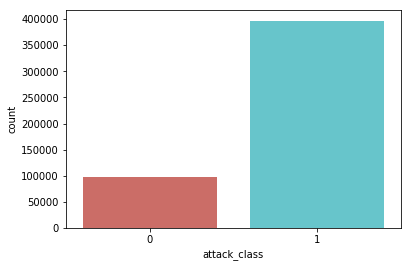

In [106]:
y=df['attack_class']
y.shape
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='attack_class',data=df,palette='hls')
plt.show()

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state =42)
print(X_train.shape)
print(X_test.shape)

(345814, 116)
(148206, 116)


In [32]:
#logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)






LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy of logistic regression classifier on test set: 0.99

Confusion Matrix is :
 [[ 28989    166]
 [   638 118413]]

 Printing Confusion Matrix



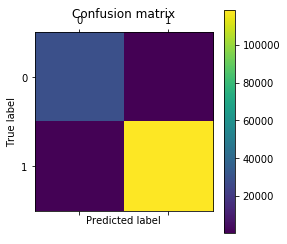

Classification Report is:
              precision    recall  f1-score   support

          0       0.98      0.99      0.99     29155
          1       1.00      0.99      1.00    119051

avg / total       0.99      0.99      0.99    148206



In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

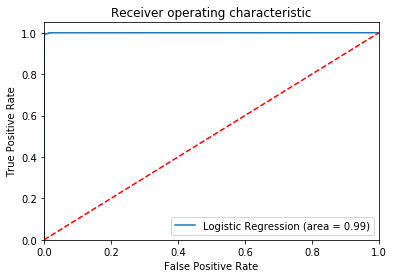

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



## Nearest Neighbor classifier

In [38]:
x=x.head(50000)
y=y.head(50000)

In [39]:
#knn classfrom sklearn.neighbors import KNeighborsClassifierifier
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state =42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy of nearest neighbor classifier on test set: 1.00

Confusion Matrix is :
 [[11448     5]
 [    6  3541]]

 Printing Confusion Matrix



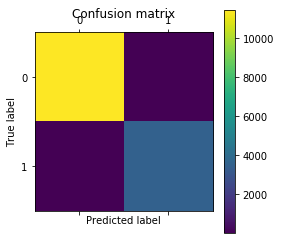

Classification Report is:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     11453
          1       1.00      1.00      1.00      3547

avg / total       1.00      1.00      1.00     15000



In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of nearest neighbor classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))

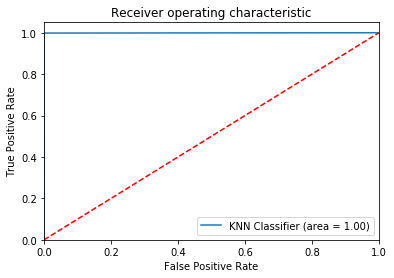

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()



## Support Vector Machine

In [45]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy of SVM on test set: 0.98
Confusion Matrix is :
 [[11428    25]
 [  286  3261]]

 Printing Confusion Matrix



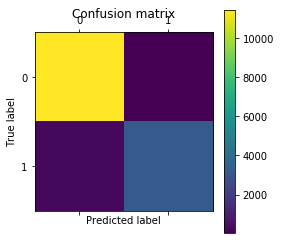

Classification Report is:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99     11453
          1       0.99      0.92      0.95      3547

avg / total       0.98      0.98      0.98     15000



In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of SVM on test set: {:.2f}'.format(clf.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))

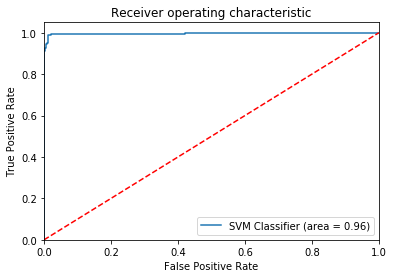

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Classifier (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

## Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)



GaussianNB(priors=None)

Accuracy of Multinomial on test set: 0.95

Confusion Matrix is :
 [[ 29116     39]
 [  7717 111334]]

 Printing Confusion Matrix



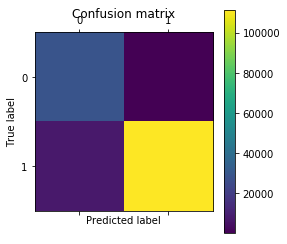

Classification Report is:
              precision    recall  f1-score   support

          0       0.79      1.00      0.88     29155
          1       1.00      0.94      0.97    119051

avg / total       0.96      0.95      0.95    148206



In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred=clf.predict(X_test)
print('Accuracy of Multinomial on test set: {:.2f}'.format(clf.score(X_test, y_test)))


cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

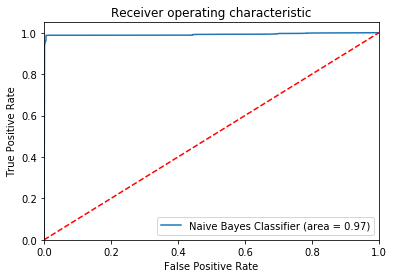

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gauss_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifier (area = %0.2f)' % gauss_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gaussian_naive_ROC')
plt.show()